In [ ]:
import tensorflow as tf

# Liste uniquement les GPU disponibles
gpus = tf.config.list_physical_devices('GPU')
print(gpus)
# Affiche chaque GPU
if gpus:
    print("GPUs disponibles :")
    for gpu in gpus:
        print(gpu)
else:
    print("Aucun GPU disponible")


In [2]:
import tensorflow as tf
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import warnings

input_shape = 128

def load_and_preprocess_image(filename):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels=3)
    # img = tf.image.resize(img, [input_shape, input_shape])
    img = img.numpy()  # Convertir en tableau NumPy
    return img

def load_images_from_directory(directory_path, max_images_per_label=None):
    image_paths = []
    labels = []
    label_names = []

    for label in os.listdir(directory_path):
        label_path = os.path.join(directory_path, label)
        if os.path.isdir(label_path):
            label_image_count = 0
            for filename in os.listdir(label_path):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                    # Check if the filename should be included based on the augmentation flag
                    if max_images_per_label is not None and label_image_count >= max_images_per_label:
                        break
                    image_paths.append(os.path.join(label_path, filename))
                    labels.append(label)
                    label_image_count += 1
                    if label not in label_names:
                        label_names.append(label)
    
    label_names.sort()  # Trier les labels par ordre alphabétique
    return image_paths, labels, label_names

def images_to_numpy(image_paths, labels, label_names):
    images = []
    for path in tqdm(image_paths, desc="Processing images", unit="image"):
        image = load_and_preprocess_image(path)
        images.append(image)
    
    labels = [label_names.index(label) for label in labels]
    
    print("Converting images to NumPy array...")
    images = np.array(images) 
    return images, np.array(labels)


directory_path = '../data/pokemon-128aug'
max_images_per_label = 1000000
image_paths, labels, label_names = load_images_from_directory(directory_path, max_images_per_label=max_images_per_label)
images, labels = images_to_numpy(image_paths, labels, label_names)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Afficher quelques détails pour vérification
print(f"Total images: {len(images)}")
print(f"Training images: {X_train.shape[0]}, Test images: {X_test.shape[0]}")
print(f"Number of classes: {len(label_names)}")
print(f"Class names: {label_names}")


2024-08-09 19:35:53.095725: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 19:35:53.112091: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 19:35:53.117096: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-09 19:35:53.129993: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-09 19:35:53.791438: W tensorflow/compiler/tf2

Converting images to NumPy array...
Total images: 71748
Training images: 57398, Test images: 14350
Number of classes: 143
Class names: ['Abra', 'Aerodactyl', 'Alakazam', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marow

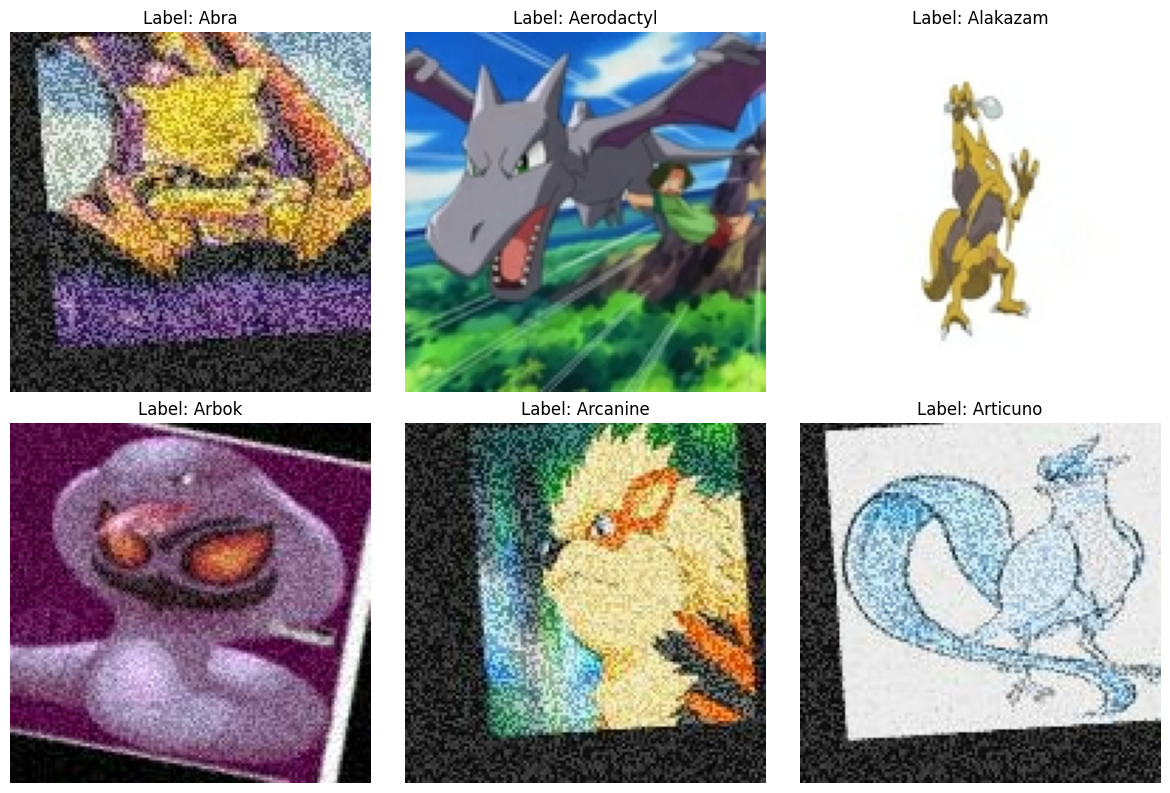

In [3]:
import matplotlib.pyplot as plt
import random

def preview_images(images, labels, label_names):
    """
    Affiche 6 images au hasard des 6 premiers labels.

    Parameters:
    - images: Array de toutes les images.
    - labels: Array des labels correspondants aux images.
    - label_names: Liste des noms des labels.
    """
    # Trouver les indices des 6 premiers labels
    unique_labels = list(set(labels))
    unique_labels.sort()
    first_six_labels = unique_labels[:6]

    plt.figure(figsize=(12, 8))
    
    for i, label in enumerate(first_six_labels):
        # Obtenir tous les indices pour le label actuel
        indices = np.where(labels == label)[0]
        # Choisir un indice au hasard parmi ceux-ci
        random_index = random.choice(indices)
        # Obtenir l'image correspondante
        image = images[random_index]

        plt.subplot(2, 3, i + 1)
        plt.imshow(image.astype('uint8'))  # Assurez-vous que l'image est dans un format d'affichage approprié
        plt.title(f"Label: {label_names[label]}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Utilisation de la fonction pour afficher les images
preview_images(X_train, y_train, label_names)


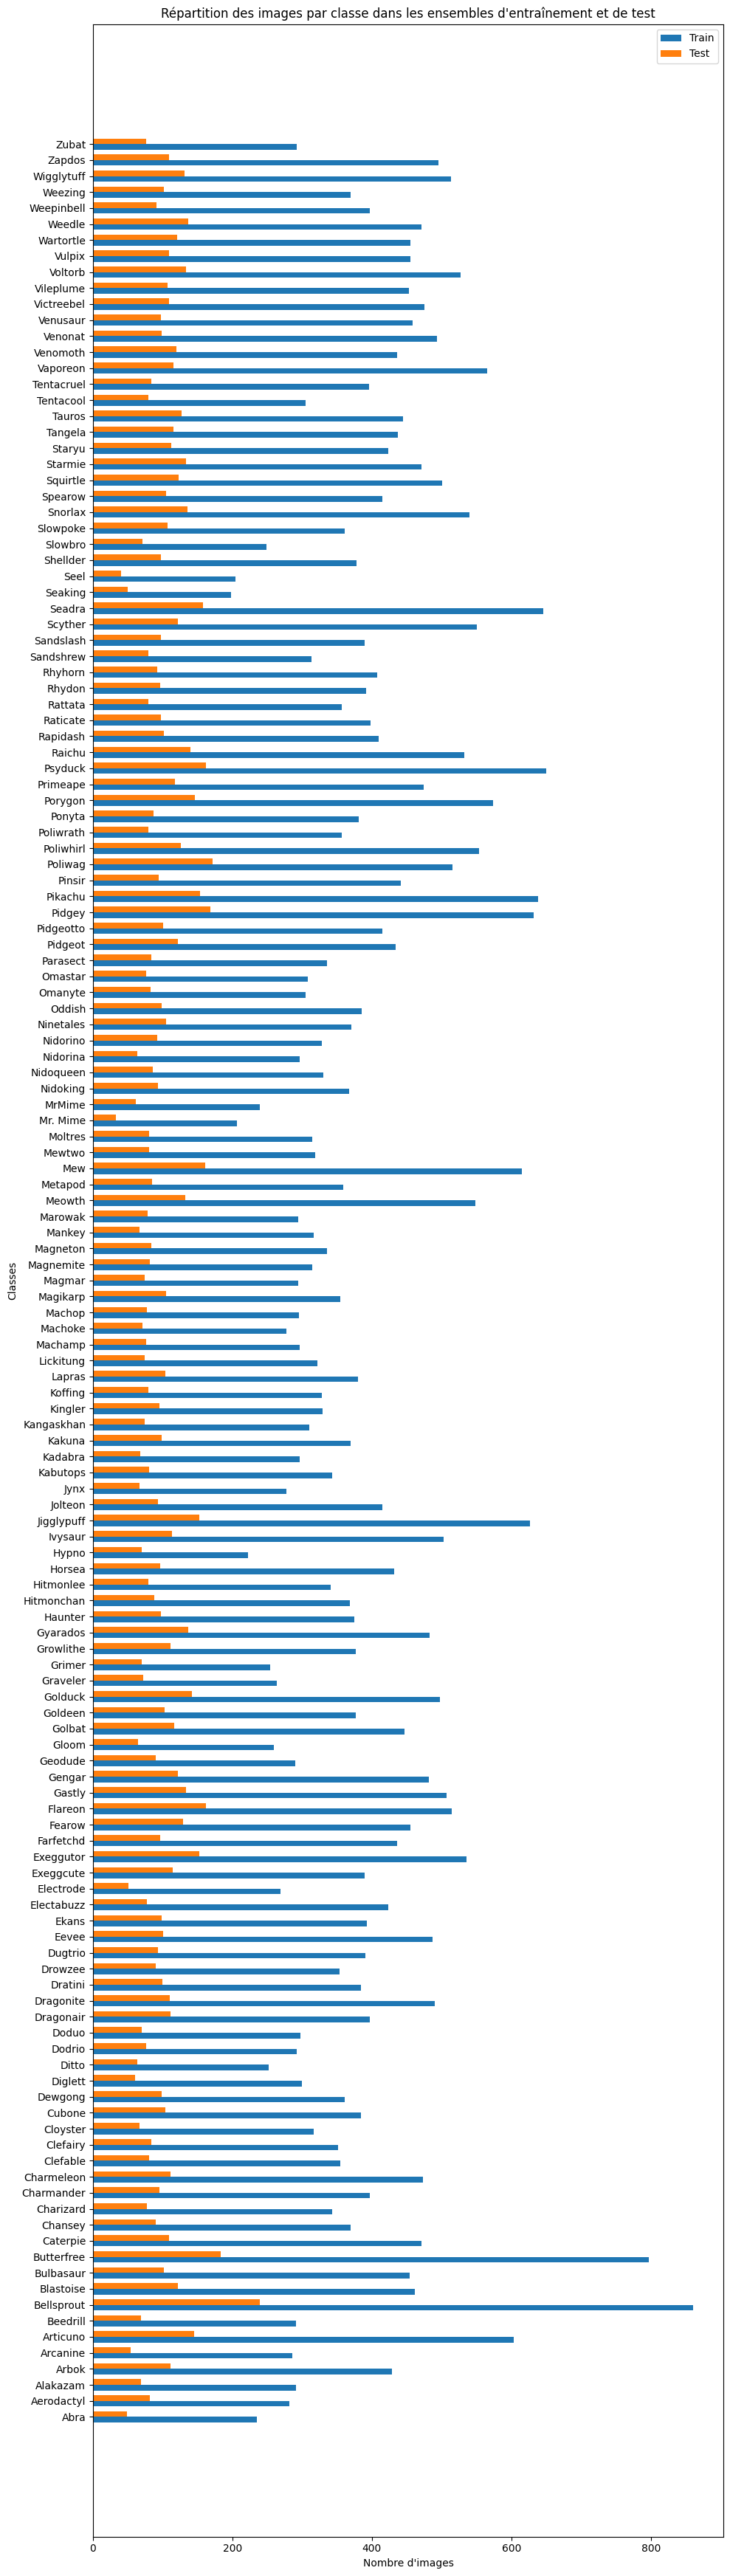

In [4]:
import matplotlib.pyplot as plt

# Compter le nombre d'images par classe dans les ensembles d'entraînement et de test
train_counts = [np.sum(y_train == i) for i in range(len(label_names))]
test_counts = [np.sum(y_test == i) for i in range(len(label_names))]

# Configuration du graphique
fig, ax = plt.subplots(figsize=(10, 35))
index = np.arange(len(label_names))
bar_height = 0.35

# Barres pour l'ensemble d'entraînement et de test
train_bar = ax.barh(index, train_counts, bar_height, label='Train')
test_bar = ax.barh(index + bar_height, test_counts, bar_height, label='Test')

# Ajouter des étiquettes
ax.set_ylabel('Classes')
ax.set_xlabel('Nombre d\'images')
ax.set_title('Répartition des images par classe dans les ensembles d\'entraînement et de test')
ax.set_yticks(index + bar_height / 2)
ax.set_yticklabels(label_names)
ax.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()


In [5]:
num_classes = len(label_names)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Reshape, LSTM, TimeDistributed
from tensorflow.keras.optimizers import Adam
import numpy as np

# Number of classes (should match the number of labels)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(input_shape, input_shape, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()




/home/eth/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 143)            │       293,007 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,057,935 (23.11 MB)

 Trainable params: 6,057,935 (23.11 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import math
print("Start a training ;3")

early_stopping = EarlyStopping(
    monitor='loss',  
    patience=5,      
    verbose=1,      
    restore_best_weights=True 
)
    
def step_decay(epoch):
    initial_lr = 0.001
    drop = 0.7
    epochs_drop = 8.0
    lr = initial_lr * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lr

lr_scheduler = LearningRateScheduler(step_decay, verbose=1)

lrate = LearningRateScheduler(step_decay)

history = model.fit(X_train, y_train,
                    epochs=100,  # Ajustez le nombre d'époques selon vos besoins
                    batch_size=16,
                    shuffle=True,
                    callbacks=[early_stopping, lr_scheduler],
                    validation_data=(X_test, y_test))

Start a training ;3


2024-08-09 19:42:01.141378: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2821226496 exceeds 10% of free system memory.
2024-08-09 19:42:03.102333: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2821226496 exceeds 10% of free system memory.



Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100


I0000 00:00:1723225325.809785   42851 service.cc:146] XLA service 0x7bf0bc00dd00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723225325.809844   42851 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Ti, Compute Capability 8.9
2024-08-09 19:42:05.845444: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-09 19:42:06.016427: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-08-09 19:42:06.897933: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1234', 144 bytes spill stores, 144 bytes spill loads

2024-08-09 19:42:07.074796: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in f

  23/3588 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.0132 - loss: 19.7647   

I0000 00:00:1723225333.835067   42851 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3583/3588 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1016 - loss: 4.3853

2024-08-09 19:42:36.853413: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1234', 116 bytes spill stores, 116 bytes spill loads

2024-08-09 19:42:37.324433: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1234', 144 bytes spill stores, 144 bytes spill loads



3588/3588 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1018 - loss: 4.3840

2024-08-09 19:42:39.211705: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_4', 68 bytes spill stores, 68 bytes spill loads

2024-08-09 19:42:40.852228: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_129', 348 bytes spill stores, 348 bytes spill loads

2024-08-09 19:42:44.003175: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_129', 476 bytes spill stores, 444 bytes spill loads

2024-08-09 19:42:44.057641: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_129', 16 bytes spill stores, 16 bytes spill loads



3588/3588 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.1018 - loss: 4.3838 - val_accuracy: 0.3994 - val_loss: 2.4019 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/100
3588/3588 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.4102 - loss: 2.3346 - val_accuracy: 0.5195 - val_loss: 1.9011 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/100
3588/3588 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.5228 - loss: 1.8546 - val_accuracy: 0.5607 - val_loss: 1.7165 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/100
3588/3588 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.5743 - loss: 1.6395 - val_accuracy: 0.5941 - val_loss: 1.5939 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/100
3588/3588 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6020 - loss: 1.5120 - val_accuracy: 0.5975 - val_loss: 1.5701 

In [8]:
model.save('pokemon-model.keras')

In [9]:
import os
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def save_metrics_to_readme(model, X_test, y_test, labels, path):
    # Ensure the path exists
    os.makedirs(path, exist_ok=True)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Assuming categorical output
    y_test_classes = np.argmax(y_test, axis=1)  # Assuming categorical true labels

    # Sort labels alphabetically and get sorted indices
    sorted_indices = np.argsort(labels)
    sorted_labels = np.array(labels)[sorted_indices]

    # Map original classes to sorted classes
    y_pred_classes_sorted = np.array([np.where(sorted_indices == c)[0][0] for c in y_pred_classes])
    y_test_classes_sorted = np.array([np.where(sorted_indices == c)[0][0] for c in y_test_classes])
    
    # Calculate metrics with sorted classes
    accuracy = accuracy_score(y_test_classes_sorted, y_pred_classes_sorted)
    precision = precision_score(y_test_classes_sorted, y_pred_classes_sorted, average='weighted')
    recall = recall_score(y_test_classes_sorted, y_pred_classes_sorted, average='weighted')
    f1 = f1_score(y_test_classes_sorted, y_pred_classes_sorted, average='weighted')
    conf_matrix = confusion_matrix(y_test_classes_sorted, y_pred_classes_sorted)
    class_report = classification_report(y_test_classes_sorted, y_pred_classes_sorted, target_names=sorted_labels)

    # Save the confusion matrix plot with sorted labels
    plt.figure(figsize=(50, 35))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted_labels, yticklabels=sorted_labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt_path = os.path.join(path, 'confusion_matrix.png')
    plt.savefig(plt_path)
    plt.close()

    # Write metrics and additional information to README.md
    readme_path = os.path.join(path, 'README.md')
    with open(readme_path, 'w') as f:
        f.write("# Model Evaluation Metrics\n\n")
        
        # Add model input information (corrected to single sample shape)
        input_shape = X_test.shape[1:]  # Extracting the shape of a single sample
        f.write("## Model Input\n")
        f.write("```\n")
        f.write(f"Input shape: {input_shape}\n")
        f.write("```\n\n")
        
        # Add list of labels
        f.write("## Class Labels\n")
        f.write("```\n")
        for i, label in enumerate(sorted_labels):
            f.write(f"{i}: {label}\n")
        f.write("```\n\n")
        
        # Add evaluation metrics
        f.write(f"## Accuracy: {accuracy:.4f}\n")
        f.write(f"## Precision: {precision:.4f}\n")
        f.write(f"## Recall: {recall:.4f}\n")
        f.write(f"## F1 Score: {f1:.4f}\n\n")
        
        # Add classification report
        f.write("## Classification Report\n")
        f.write("```\n")
        f.write(class_report)
        f.write("```\n\n")
        
        # Add confusion matrix image
        f.write("## Confusion Matrix\n")
        f.write(f"![Confusion Matrix]({plt_path})\n")


save_metrics_to_readme(model, X_test, y_test, label_names, 'pokemon-cnn-v1.3')


2024-08-09 20:21:55.600303: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_96', 20 bytes spill stores, 20 bytes spill loads

2024-08-09 20:21:55.747472: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_96', 236 bytes spill stores, 236 bytes spill loads



449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
